<a href="https://colab.research.google.com/github/ashishcas/Python/blob/master/Rock_and_mine_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
test_data = pd.read_csv('/content/gdrive/My Drive/Datasets/sonar.csv')

#print(test_data)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
#Defining function to read data set
def read_dataset():
  dir_path = ""
  df = pd.read_csv('/content/gdrive/My Drive/Datasets/sonar.csv')
  X = df[df.columns[0:60]].values
  y = df[df.columns[60]]
  
  #ENCODING the dependent variable
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  Y = one_hot_encode(y)
  print(X.shape)
  return(X,Y)

#Defining function for one hot encoding technique
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels] = 1
  return one_hot_encode

In [0]:
X,Y = read_dataset()

(207, 60)


In [0]:
#Shuffling the data set for better results

X,Y = shuffle(X,Y,random_state = 1)
print(Y.shape)

(207, 2)


In [0]:
#Dividing training and testing data set
train_x , test_x , train_y , test_y = train_test_split(X,Y,test_size = 0.20,random_state = 415)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(165, 60)
(42, 60)
(165, 2)
(42, 2)


In [0]:
#Defining the parameters for the tensor
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape = [1],dtype = float)
n_dim = X.shape[1]
print("n dim: ",n_dim)
n_class = 2
model_path = "TensorFlow_Basics"

n dim:  60


In [0]:
#Defining the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

# Inputs and outputs
x = tf.placeholder(tf.float32,[None, n_dim])
y_ = tf.placeholder(tf.float32,[None, n_class])

# Model parameters
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))


In [0]:
#Define the model
def multilayer_perceptron(x,weights,biases):
  
  layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  #Hidden layer with sigmoid activation
  layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  layer_2  = tf.nn.sigmoid(layer_2)
  
  #Hidden layer with sigmoid activation
  layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
  layer_3  = tf.nn.sigmoid(layer_3)
  
  #Hidden layer with RELU activation
  layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
  layer_4  = tf.nn.relu(layer_4)
  
  #Output layer with linear activation
  layer_out = tf.matmul(layer_4,weights['out']),biases['out']
  return layer_out

In [0]:
#Defining the weights and biases for the layers

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
    }

In [0]:
# Initialization
init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

print(y)

#y_f = tf.concat(1,y_)

print(y_)

(<tf.Tensor 'MatMul_29:0' shape=(?, 2) dtype=float32>, <tf.Variable 'Variable_21:0' shape=(2,) dtype=float32_ref>)
Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


epoch:  0  -  cost:  83.98783  - MSE:  8977.048879216163 - Train Accuracy:  0.54545456
epoch:  1  -  cost:  12.243441  - MSE:  130.89677480614438 - Train Accuracy:  0.45454547
epoch:  2  -  cost:  1.1101046  - MSE:  6.811382630128603 - Train Accuracy:  0.53939396
epoch:  3  -  cost:  3.6671832  - MSE:  13.166191104778347 - Train Accuracy:  0.45454547
epoch:  4  -  cost:  0.78249586  - MSE:  2.218209905484032 - Train Accuracy:  0.45454547
epoch:  5  -  cost:  1.0530913  - MSE:  4.257021437043643 - Train Accuracy:  0.55151516
epoch:  6  -  cost:  1.4147395  - MSE:  3.097586863759127 - Train Accuracy:  0.45454547
epoch:  7  -  cost:  1.1630338  - MSE:  2.5275622311309496 - Train Accuracy:  0.44848484
epoch:  8  -  cost:  0.7765314  - MSE:  2.363540639185442 - Train Accuracy:  0.47272727
epoch:  9  -  cost:  0.77210623  - MSE:  3.166351987169087 - Train Accuracy:  0.54545456
epoch:  10  -  cost:  0.9428942  - MSE:  2.2616738704197092 - Train Accuracy:  0.46060607
epoch:  11  -  cost:  0.63

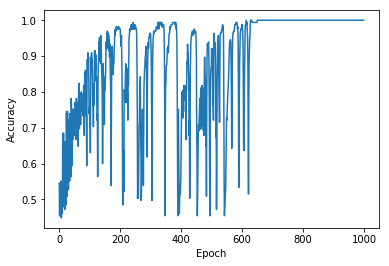

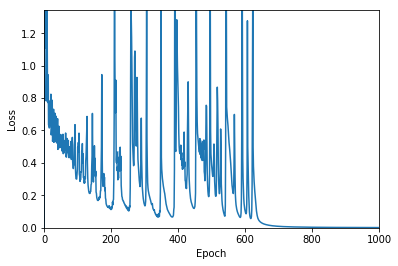

Test Accuracy:  [[-10.717317   -11.4319    ]
 [ -9.151958    -0.87932503]
 [ -4.0031643   -6.5002666 ]
 [ -9.71266     -1.561655  ]
 [ -8.380161    -0.7817229 ]
 [ -5.604783    -2.0314739 ]
 [-10.185248    -1.1632843 ]
 [ -3.7387042   -7.5645576 ]
 [ -2.1389465   -4.3623347 ]
 [  2.044631    -6.610331  ]
 [ -8.681315    -0.79827356]
 [ -5.481012    -2.5352776 ]
 [ -1.7214108   -6.0766883 ]
 [  4.5956283  -11.290895  ]
 [ -2.6141253  -10.143116  ]
 [ -7.787455    -0.9212308 ]
 [ -7.4687405  -11.807676  ]
 [-10.356281    -1.2176391 ]
 [ -1.493361    -5.043655  ]
 [  0.4958033   -5.2633724 ]
 [ -2.8825383   -5.3983893 ]
 [-11.148464    -1.6034942 ]
 [  0.20696181  -9.99589   ]
 [  2.0660949   -7.055313  ]
 [  3.1653154   -9.79414   ]
 [ -6.351277    -1.0707476 ]
 [  1.4491272   -8.431833  ]
 [-11.953582    -1.8121883 ]
 [-12.575524    -6.0871177 ]
 [-11.573163    -2.3997457 ]
 [  6.22897     -8.567706  ]
 [ -5.8606524   -1.5390706 ]
 [  0.71483976  -8.532382  ]
 [ -5.599353    -3.5860078 

In [0]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# Launch the graph
sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

# Calculate the cost and the accuracy for each epoch
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function,feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     print("Accuracy: ", (sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))
    pred_y = sess.run(y,feed_dict={x:test_x} )
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy,feed_dict={x:train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
    
save_path = saver.save(sess, model_path)
print("Model saved in file: %s", save_path)

plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)/100])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Print the final mean square error
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.square(pred_y - test_y))
print("Test Accuracy: ", (sess.run(y, feed_dict={x:test_x, y_:test_y} )))

# Print the final mean square error
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y- test_y))
print("MSE: %.4f" % sess.run(mse))